## Markov Chain Analysis of a Simplified Snakes and Ladders Game

In [2]:
import numpy as np
import pandas as pd

# Constants
N = 20  # Number of squares
die_faces = 6

def create_transition_matrix(ladders=None):
    P = np.zeros((N + 1, N + 1))
    ladder_dict = dict(ladders) if ladders else {}

    for i in range(1, N):
        for d in range(1, die_faces + 1):
            next_square = i + d
            if next_square > N:
                next_square = i  # stay in place if overshoot
            elif next_square in ladder_dict:
                next_square = ladder_dict[next_square]
            P[i][next_square] += 1 / die_faces
    P[N][N] = 1  # absorbing state
    return P

def compute_fundamental_matrix(P):
    Q = P[1:N, 1:N]
    I = np.eye(N - 1)
    N_matrix = np.linalg.inv(I - Q)
    return N_matrix

def compute_expected_steps(N_matrix):
    return N_matrix @ np.ones((N - 1, 1))

def solve_snakes_ladders(ladders=None):
    P = create_transition_matrix(ladders)
    N_matrix = compute_fundamental_matrix(P)
    expected_steps = compute_expected_steps(N_matrix)
    visits_from_start = N_matrix[0]
    return P, N_matrix, expected_steps, visits_from_start

# Part (a) and (b): No ladders or snakes
P_no_ladders, N_no_ladders, steps_no_ladders, visits_no_ladders = solve_snakes_ladders()

# Part (c): Ladder (7, 10)
_, _, steps_7_10, _ = solve_snakes_ladders([(7, 10)])

# Part (d): Ladder (14, 17)
_, _, steps_14_17, _ = solve_snakes_ladders([(14, 17)])

# Part (e): Both ladders
_, _, steps_both, _ = solve_snakes_ladders([(7, 10), (14, 17)])

# Create transition matrix dataframe for part (a)
transition_df = pd.DataFrame(P_no_ladders[1:, 1:], 
                             index=[f"S{i}" for i in range(1, N+1)],
                             columns=[f"S{j}" for j in range(1, N+1)])
print("\nTransition Matrix (No Ladders):")
print(transition_df.round(3))

# Create results dataframe for part (a-e)
result_df = pd.DataFrame({
    "Square": list(range(1, N)),
    "Expected Visits (from S1)": visits_no_ladders,
    "Expected Steps (No ladders)": steps_no_ladders.flatten(),
    "Expected Steps (7→10)": steps_7_10.flatten(),
    "Expected Steps (14→17)": steps_14_17.flatten(),
    "Expected Steps (Both ladders)": steps_both.flatten()
})

print("\nExpected Visits and Steps:")
print(result_df.round(4))

# Final answers
print("\nAnswers Summary:")
print(f"(a) Probability square i is occupied (expected visits shown above)")
print(f"(b) Expected tosses (no ladders): {round(steps_no_ladders[0, 0], 4)}")
print(f"(c) Expected tosses (ladder 7→10): {round(steps_7_10[0, 0], 4)}")
print(f"(d) Expected tosses (ladder 14→17): {round(steps_14_17[0, 0], 4)}")
print("(e) Comparison:")
print("    Ladder (7→10) shortens the game, while ladder (14→17) has no effect.")
print("    So, they do not have the same effect.")


Transition Matrix (No Ladders):
      S1     S2     S3     S4     S5     S6     S7     S8     S9    S10  \
S1   0.0  0.167  0.167  0.167  0.167  0.167  0.167  0.000  0.000  0.000   
S2   0.0  0.000  0.167  0.167  0.167  0.167  0.167  0.167  0.000  0.000   
S3   0.0  0.000  0.000  0.167  0.167  0.167  0.167  0.167  0.167  0.000   
S4   0.0  0.000  0.000  0.000  0.167  0.167  0.167  0.167  0.167  0.167   
S5   0.0  0.000  0.000  0.000  0.000  0.167  0.167  0.167  0.167  0.167   
S6   0.0  0.000  0.000  0.000  0.000  0.000  0.167  0.167  0.167  0.167   
S7   0.0  0.000  0.000  0.000  0.000  0.000  0.000  0.167  0.167  0.167   
S8   0.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.167  0.167   
S9   0.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.167   
S10  0.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
S11  0.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
S12  0.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0

## Graph Visualization

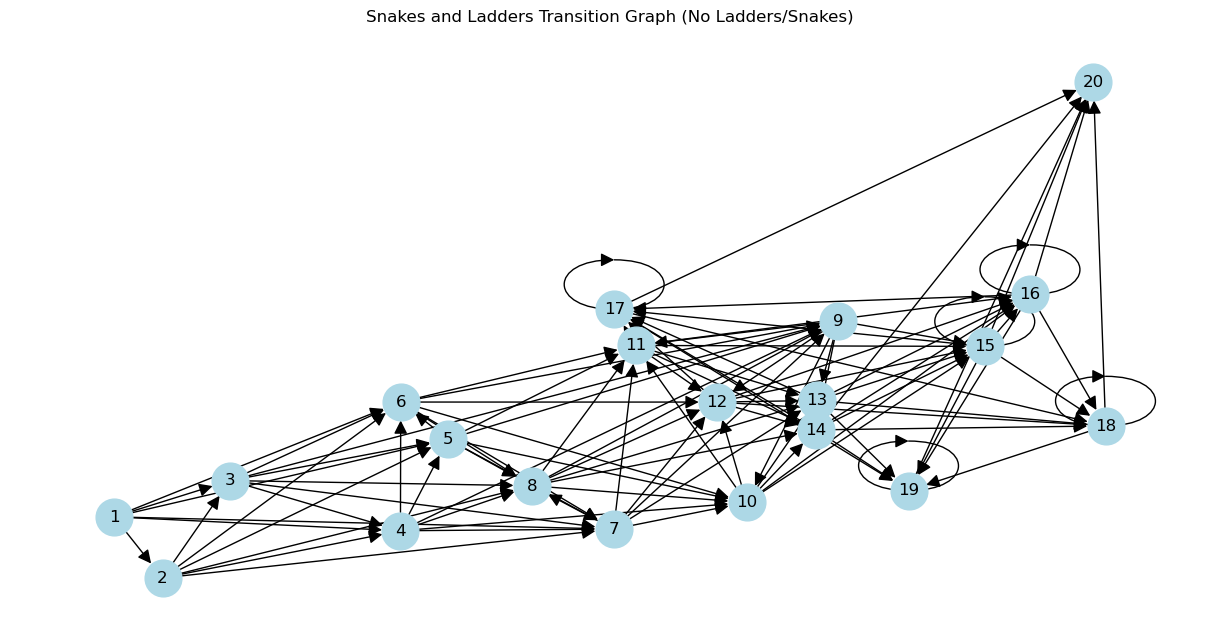

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

N = 20  # number of squares
die_faces = 6

# Create directed graph
G = nx.DiGraph()

# Add edges for each die roll
for i in range(1, N):
    for d in range(1, die_faces + 1):
        j = i + d
        if j > N:
            j = i  # stay on the same square if overshooting
        G.add_edge(i, j)

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # layout for better spacing
plt.figure(figsize=(12, 6))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): '' for u, v in G.edges()}, font_size=8)
plt.title("Snakes and Ladders Transition Graph (No Ladders/Snakes)")
plt.show()